# Libraries


In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random
import math

# Utility Functions

In [2]:

# Given coordinates
coordinates = np.array([[1, 2], [1, 4], [2, 6], [7, 3], [8, 1], [8, 12], [13, 24], [15, 16], [20, 5], [18, 4], [21, 22]])

def creategraph(coordinates):
    G = nx.Graph()
    for i, coord in enumerate(coordinates):
        G.add_node(i, pos=coord)
    for i in range(len(coordinates)):
        for j in range(i + 1, len(coordinates)):
            # Calculated Eucladian Distance
            distance = np.linalg.norm(coordinates[i] - coordinates[j])
            G.add_edge(i, j, weight=distance)
    return G

def drawpath(graph, besttour):
    pos = nx.get_node_attributes(G, 'pos')
    nx.draw(graph, pos, node_color='#387395', edge_color='gray', with_labels=True)
    tour_edges = list(zip(besttour, besttour[1:] + [besttour[0]]))
    nx.draw_networkx_edges(graph, pos, edgelist=tour_edges, edge_color='r', width=2)
    plt.axis('equal')
    plt.show()

# Hill Climbing

In [3]:
def simplehillclimbing(graph):
    nodes = list(graph.nodes)
    n = len(nodes) 
    nodesexplored = 0 
    pathsize = 0  
    startnode = 0
    tour = [startnode]
    unvisited = set(nodes)
    unvisited.remove(startnode)
    
    while unvisited:
        
        nearestneighbor = min(unvisited, key=lambda x: graph[tour[-1]][x]['weight'])
        tour.append(nearestneighbor)
        unvisited.remove(nearestneighbor)
    tour.append(startnode)
    tourlength = sum(graph[tour[i]][tour[i + 1]]['weight'] for i in range(len(tour) - 1))

    while True:
        nodesexplored += 1  
        besttourlength = tourlength
        besttour = tour.copy()
        
        for i in range(len(tour) - 1):
            for j in range(i + 1, len(tour)):
                newtour = tour.copy()
                newtour[i], newtour[j] = newtour[j], newtour[i]
                newtourlength = 0

                for k in range(len(newtour) - 1):
                    if graph.has_edge(newtour[k], newtour[k + 1]):
                        newtourlength += graph[newtour[k]][newtour[k + 1]]['weight']

                if newtourlength < besttourlength:
                    besttourlength = newtourlength
                    besttour = newtour

        if besttourlength == tourlength:
            break

        tourlength = besttourlength
        tour = besttour

    pathsize = len(besttour)-1
    
    print(f"Time complexity for Simple Hill Climbing: O({nodesexplored})")
    print(f"Space complexity for Simple Hill Climbing: O({pathsize})")
    
    besttour = list(dict.fromkeys(besttour))
    if besttour[0] != besttour[-1]:
        besttour.append(besttour[0])
    return besttour

# Stochastic hill climbing


In [4]:
def stochastichillclimbing(graph):
    nodes = list(graph.nodes)
    n = len(nodes) 
    nodesexplored = 0 
    pathsize = 0  
    startnode = 0
    tour = [startnode]
    unvisited = set(nodes)
    unvisited.remove(startnode)

    while unvisited:
       
        # Select a random neighbor instead of the nearest neighbor
        nearestneighbor = random.choice(list(unvisited))
        tour.append(nearestneighbor)
        unvisited.remove(nearestneighbor)
        
    tour.append(startnode)

    tourlength = sum(graph[tour[i]][tour[i + 1]]['weight'] for i in range(len(tour) - 1))

    while True:
        nodesexplored += 1  
        besttourlength = tourlength
        besttour = tour.copy()
        for i in range(len(tour) - 1):
            for j in range(i + 1, len(tour)):
                newtour = tour.copy()
                newtour[i], newtour[j] = newtour[j], newtour[i]
                newtourlength = 0

                for k in range(len(newtour) - 1):
                    if graph.has_edge(newtour[k], newtour[k + 1]):
                        newtourlength += graph[newtour[k]][newtour[k + 1]]['weight']

                if newtourlength < besttourlength:
                    besttourlength = newtourlength
                    besttour = newtour

        if besttourlength == tourlength:
            break

        tourlength = besttourlength
        tour = besttour

    pathsize = len(besttour)-1

    print(f"Time complexity for Stochastic Hill Climbing: O({nodesexplored})")
    print(f"Space complexity for Stochastic Hill Climbing: O({pathsize})")

    besttour = list(dict.fromkeys(besttour))

    if besttour[0] != besttour[-1]:
        besttour.append(besttour[0])
    return besttour  

# First-choice hill climbing

In [5]:
def firstchoicehillclimbing(graph):
    nodes = list(graph.nodes)
    n = len(nodes) 
    nodesexplored = 0 
    pathsize = 0  
    startnode = 0
    tour = [startnode]
    unvisited = set(nodes)
    unvisited.remove(startnode)

    while unvisited:
        nearestneighbor = random.choice(list(unvisited))
        tour.append(nearestneighbor)
        unvisited.remove(nearestneighbor)
    tour.append(startnode)
    tourlength = sum(graph[tour[i]][tour[i + 1]]['weight'] for i in range(len(tour) - 1))

    while True:
        nodesexplored += 1  
        improved = False
        for i in range(len(tour) - 1):
            for j in range(i + 1, len(tour)):
                if tour[i] != tour[j]:
                    newtour = tour.copy()
                    newtour[i], newtour[j] = newtour[j], newtour[i]
                    newtourlength = 0

                    for k in range(len(newtour) - 1):
                        if graph.has_edge(newtour[k], newtour[k + 1]):
                            newtourlength += graph[newtour[k]][newtour[k + 1]]['weight']

                    if newtourlength < tourlength:
                        tour = newtour
                        tourlength = newtourlength
                        improved = True
                        break
                if improved:
                    break

        if not improved:
            break

    pathsize = len(tour)-1

    print(f"Time complexity for First-Choice Hill Climbing: O({nodesexplored})")
    print(f"Space complexity for First-Choice Hill Climbing: O({pathsize})")

    tour = list(dict.fromkeys(tour))

    if tour[0] != tour[-1]:
        tour.append(tour[0])
    
    return tour

# Random-restart hill climbing

In [6]:
def simplehillclimbing2(graph):
    nodes = list(graph.nodes)
    n = len(nodes)   
    time=0
    space=0
    startnode = random.choice(nodes) # Start from a random node
    tour = [startnode]
    unvisited = set(nodes)
    unvisited.remove(startnode)

    while unvisited:
       
        nearestneighbor = min(unvisited, key=lambda x: graph[tour[-1]][x]['weight'])
        tour.append(nearestneighbor)
        unvisited.remove(nearestneighbor)
        
    tour.append(startnode)

    tourlength = sum(graph[tour[i]][tour[i + 1]]['weight'] for i in range(len(tour) - 1))

    while True:
        time += 1  
        besttourlength = tourlength
        besttour = tour.copy()

        for i in range(len(tour) - 1):
            for j in range(i + 1, len(tour)):
                newtour = tour.copy()
                newtour[i], newtour[j] = newtour[j], newtour[i]
                newtourlength = 0

                for k in range(len(newtour) - 1):
                    if graph.has_edge(newtour[k], newtour[k + 1]):
                        newtourlength += graph[newtour[k]][newtour[k + 1]]['weight']

                if newtourlength < besttourlength:
                    besttourlength = newtourlength
                    besttour = newtour

        if besttourlength == tourlength:
            break

        tourlength = besttourlength
        tour = besttour

    space = len(besttour)-1

    
    besttour = list(dict.fromkeys(besttour))

    if besttour[0] != besttour[-1]:
        besttour.append(besttour[0])
    print(f"Time complexity for Random Restart Hill Climbing: O({time})")
    print(f"Space complexity for Random Restart Hill Climbing: O({space})")
    return besttour
def randomrestarthillclimbing(graph, num_runs):
    best_tour_length = float('inf')
    best_tour = None
    time=0
    space=0
    for _ in range(num_runs):
        tour= simplehillclimbing2(graph)
        tour_length = sum(graph[tour[i]][tour[i + 1]]['weight'] for i in range(len(tour) - 1))
        if tour_length < best_tour_length:
            best_tour_length = tour_length
            best_tour = tour
  
    drawpath(graph, best_tour)
   





# Simulated Annealing

In [7]:

# Function to calculate total tour length
def totaldistance(graph, tour):
    distance = 0
    for i in range(len(tour) - 1):
        distance += graph[tour[i]][tour[i+1]]['weight']
    distance += graph[tour[-1]][tour[0]]['weight'] 
    return distance

# Function to generate a random initial solution
def initialsolution(graph):
    return list(graph.nodes())

# Function to generate a random neighbor by swapping two cities
def randomneighbor(solution):
    neighbor = solution.copy()
    i, j = sorted(random.sample(range(len(solution)), 2))
    neighbor[i:j+1] = reversed(neighbor[i:j+1])
    return neighbor

def simulated_annealing(graph, initialsol, initial_temperature, cooling_rate, stopping_temperature):
    time=0
    currentsolution = initialsol(graph)
    currentcost = totaldistance(graph, currentsolution)
    bestsol = currentsolution.copy()
    bestcost = currentcost

    temperature = initial_temperature
    while temperature > stopping_temperature:
        time+=1
        neighbor_solution = randomneighbor(currentsolution)
        neighbor_cost = totaldistance(graph, neighbor_solution)
        delta = neighbor_cost - currentcost

        if delta < 0 or random.random() < math.exp(-delta / temperature):
            currentsolution = neighbor_solution
            currentcost = neighbor_cost

        if currentcost < bestcost:
            bestsol = currentsolution
            bestcost = currentcost

        temperature *= cooling_rate
    print(f"Time complexity for Simulated Annealing: O({time})")
    return bestsol


# Local Beam Search

In [8]:
def localbeamsearch(graph, k=5):
    time=0
    current_states = [random.sample(range(len(graph)), len(graph)) for _ in range(k)]
    besttour = current_states[0]  
    best_cost = totaldistance(graph, besttour)
    while True:
        time+=1
        successors = []
        for state in current_states:
            for neighbor in nx.neighbors(graph, state[-1]):
               
                if neighbor not in state:
                    new_state = state + [neighbor]
                    cost = totaldistance(graph, new_state)
                    successors.append((new_state, cost))
        
        if not successors:
            break
        
        successors.sort(key=lambda x: x[1])
        current_states = [state for state, _ in successors[:k]]

        if successors[0][1] < best_cost:
            besttour = successors[0][0]
            best_cost = successors[0][1]
        else:
            break
    print(f"Time complexity for Local Beam Search : O({time})")
    return besttour

# Results

Hill Climbing:

Time complexity for Simple Hill Climbing: O(4)
Space complexity for Simple Hill Climbing: O(11)


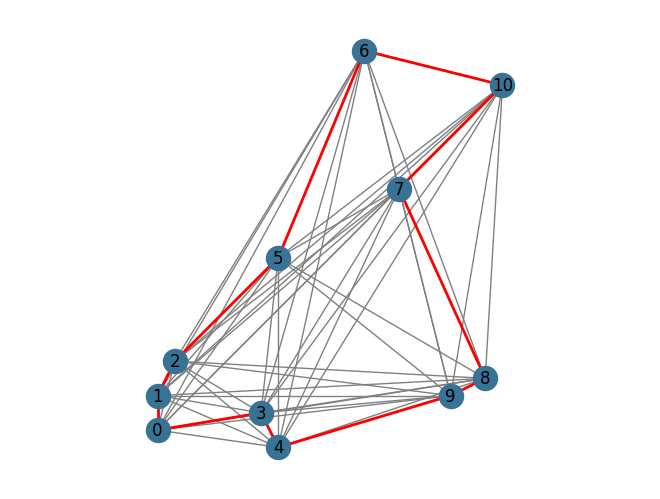

---------------------------------------------------------------------------------------

Stochastic Climbing:

Time complexity for Stochastic Hill Climbing: O(6)
Space complexity for Stochastic Hill Climbing: O(11)


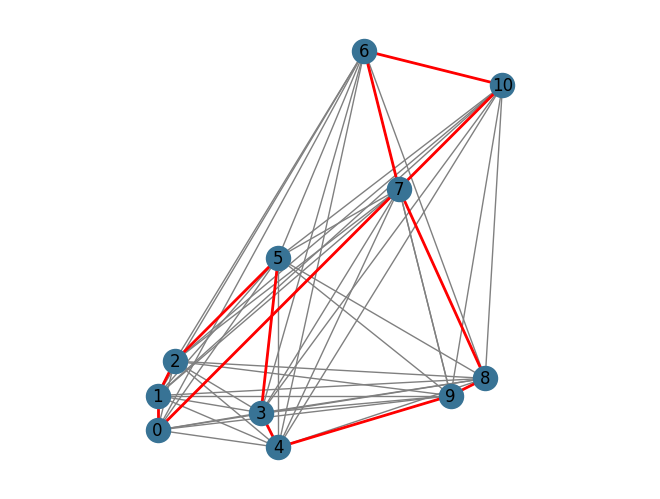

---------------------------------------------------------------------------------------

First Choice Hill Climbing:

Time complexity for First-Choice Hill Climbing: O(8)
Space complexity for First-Choice Hill Climbing: O(11)


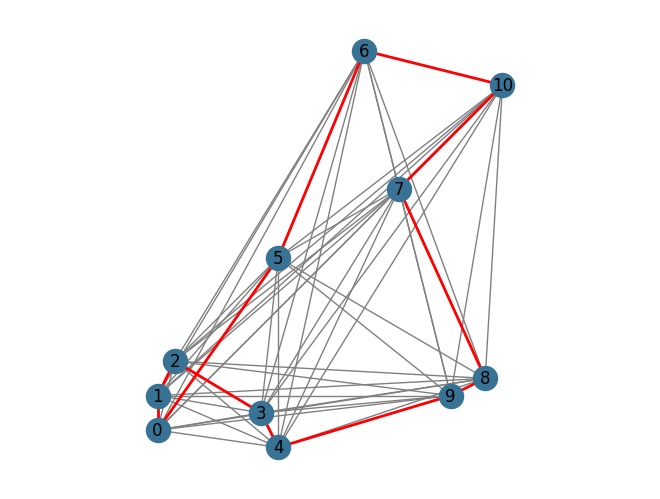

---------------------------------------------------------------------------------------

Random Restart Hill Climbing:

Time complexity for Random Restart Hill Climbing: O(2)
Space complexity for Random Restart Hill Climbing: O(11)
Time complexity for Random Restart Hill Climbing: O(2)
Space complexity for Random Restart Hill Climbing: O(11)
Time complexity for Random Restart Hill Climbing: O(3)
Space complexity for Random Restart Hill Climbing: O(11)
Time complexity for Random Restart Hill Climbing: O(2)
Space complexity for Random Restart Hill Climbing: O(11)
Time complexity for Random Restart Hill Climbing: O(4)
Space complexity for Random Restart Hill Climbing: O(11)
Time complexity for Random Restart Hill Climbing: O(8)
Space complexity for Random Restart Hill Climbing: O(11)
Time complexity for Random Restart Hill Climbing: O(3)
Space complexity for Random Restart Hill Climbing: O(11)
Time complexity for Random Restart Hill Climbing: O(3)
Space complexity for Random Restart Hill 

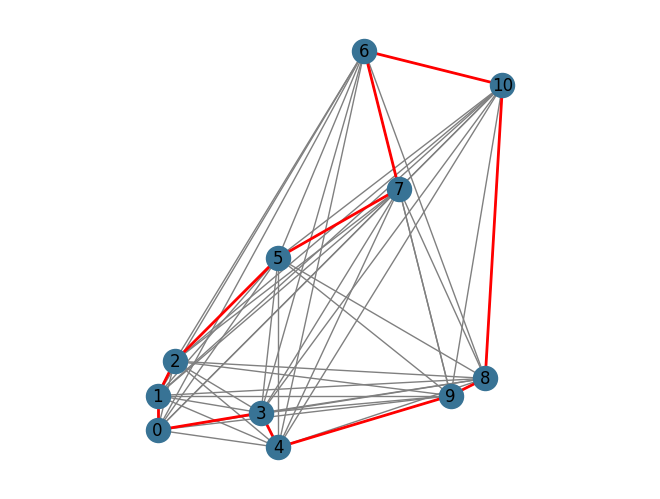

---------------------------------------------------------------------------------------

Simulated Annealing:

Time complexity for Simulated Annealing: O(917)
Space complexity for Simulated Annealing: O(11)


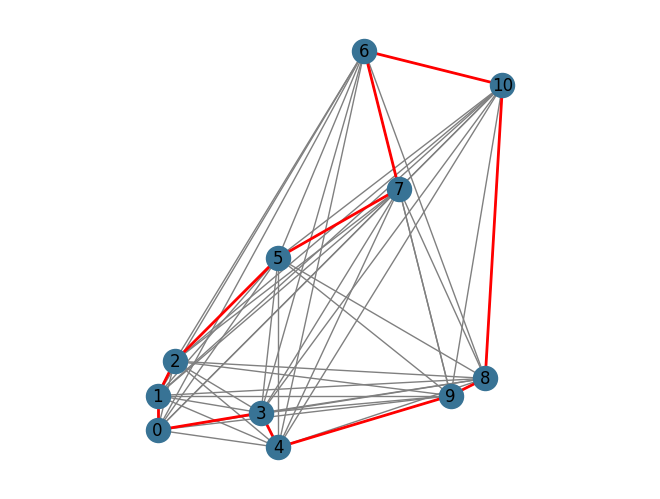

---------------------------------------------------------------------------------------

Local Beam Search:

Time complexity for Local Beam Search : O(1)
Space complexity for Local Beam Search :O(11)


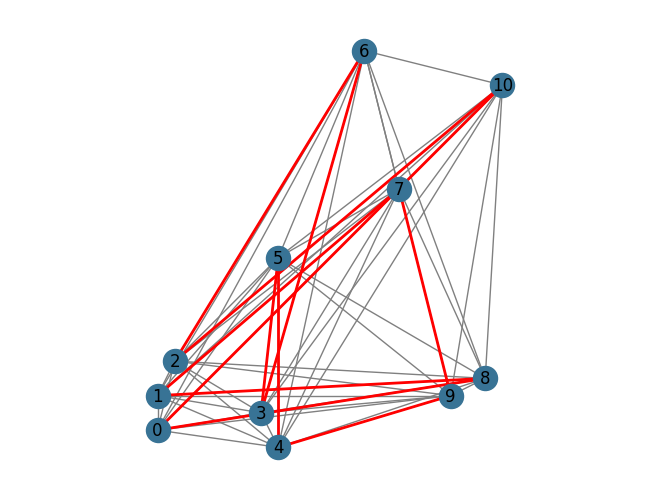

---------------------------------------------------------------------------------------



In [9]:
G = creategraph(coordinates)

print("Hill Climbing:\n")
besttour = simplehillclimbing(G)
drawpath(G, besttour)
print("---------------------------------------------------------------------------------------\n")
print("Stochastic Climbing:\n")
besttour = stochastichillclimbing(G)
drawpath(G, besttour)
print("---------------------------------------------------------------------------------------\n")
print("First Choice Hill Climbing:\n")
besttour = firstchoicehillclimbing(G)
drawpath(G, besttour)
print("---------------------------------------------------------------------------------------\n")
print("Random Restart Hill Climbing:\n")
numruns = 100
randomrestarthillclimbing(G, numruns)
print("---------------------------------------------------------------------------------------\n")
print("Simulated Annealing:\n")
initial_temperature = 1000
cooling_rate = 0.99
stopping_temperature = 0.1
bestsol = simulated_annealing(G, initialsolution, initial_temperature, cooling_rate, stopping_temperature)
print(f"Space complexity for Simulated Annealing: O({len(bestsol)})")
drawpath(G, bestsol)
print("---------------------------------------------------------------------------------------\n")
print("Local Beam Search:\n")
best_tour=localbeamsearch(G,10)
print(f"Space complexity for Local Beam Search :O({len(best_tour)})")
drawpath(G, best_tour)
print("---------------------------------------------------------------------------------------\n")



